## SpaceX Falcon 9 First Stage Landing Prediction 
#### EDA, Visualizations, and Feature Engineering
____

Importing our libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading in our data:

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Exploratory Data Analysis

First, let's see how `FlightNumber` and `Payload` affect the launch outcome.

Our classes being previously defined as `1` and `0`, meaning a succesful and unsuccesful landing of the first stage, respectively.

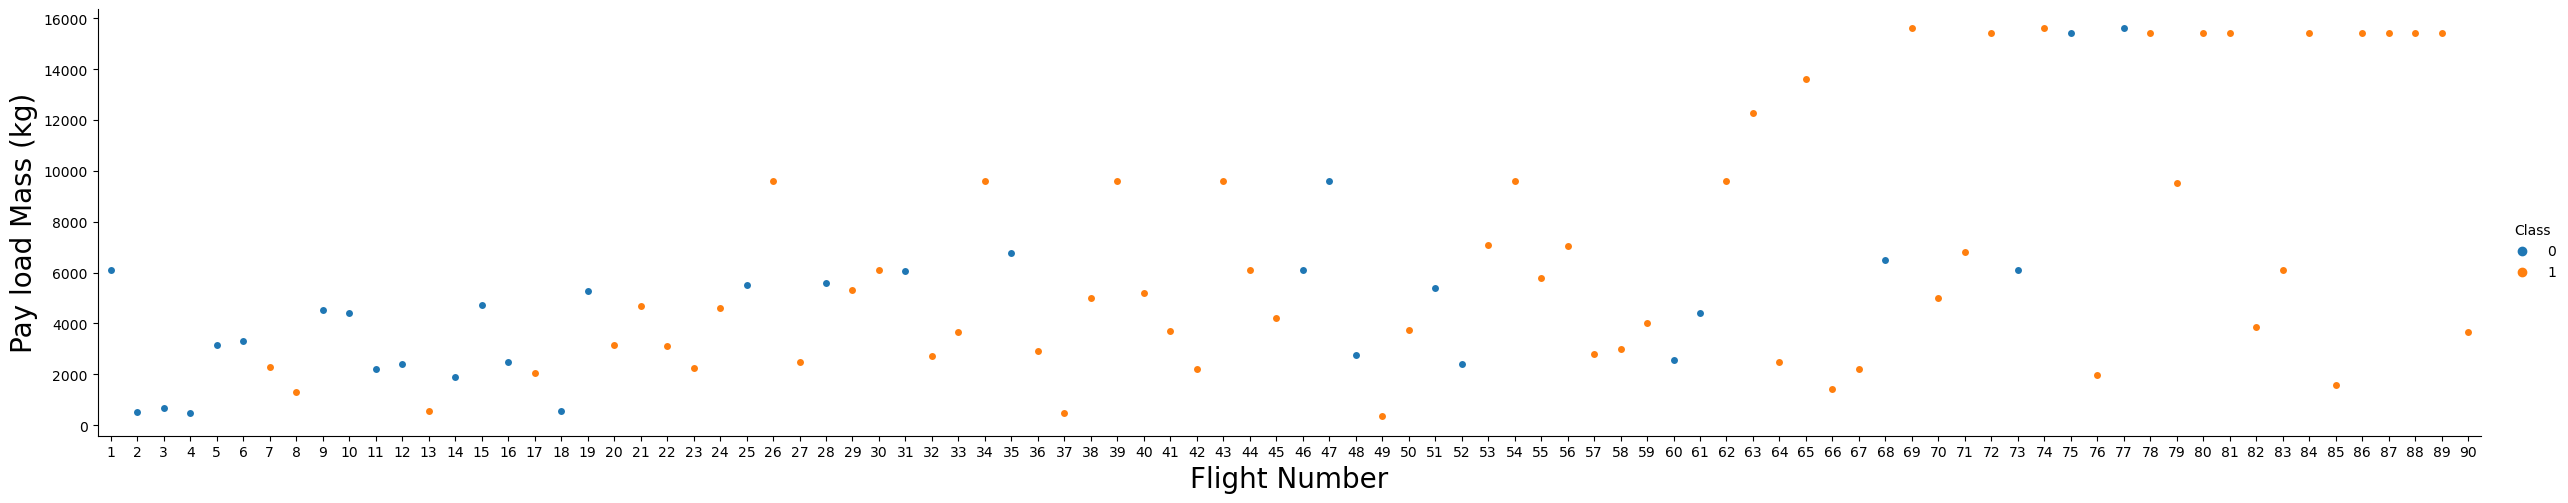

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

From inital obvservations, we can see that as `FlightNumber` increases, the first stage is more likely to land.
</br>We can also see that as `Payload` gets more massive, it is less likely that the first stage will land.

### 1. Illustrating the relationship between `FlightNumber` and `LaunchSite`

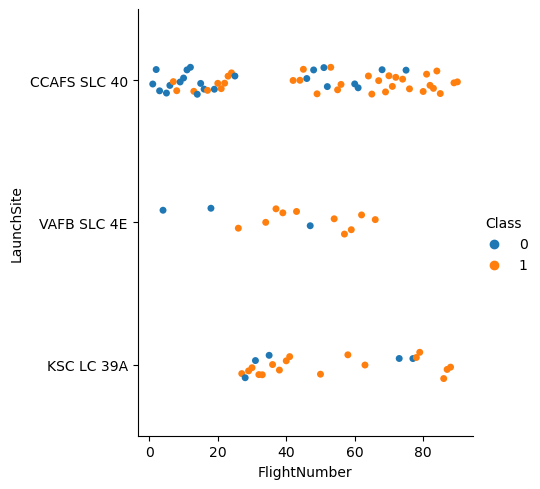

In [4]:
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')

#### Inferences:

1. CCAFS SLC 40 had the most amount of flights, class 1 and 0.
2. KSC LC 39A has the highest proportion of succesful outcomes compared it's unsucessful ones.
3. Across the board, after flight number 80 there have been consistent succesfull outcomes.

### 2. Illustrating the relationship between Payload and Launch Site

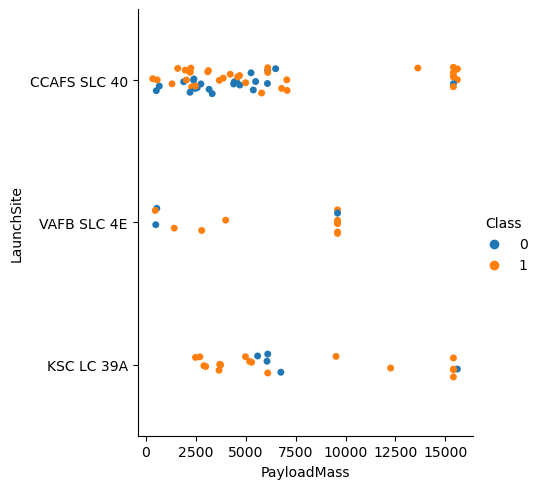

In [5]:
sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')

#### Inferences:
1. As Payload Mass increases, we are more likely to have a succesfull landing outcome.
2. There are no Payloads with a mass greater than 10000 for VAFB SLC 4E

### 3. Illustrating the relationship between success rate and orbit type

In [6]:
# grouping by orbit, getting class mean per group
grouped_by_orbit = df.groupby('Orbit')['Class'].mean()

Text(0, 0.5, 'Class AVG')

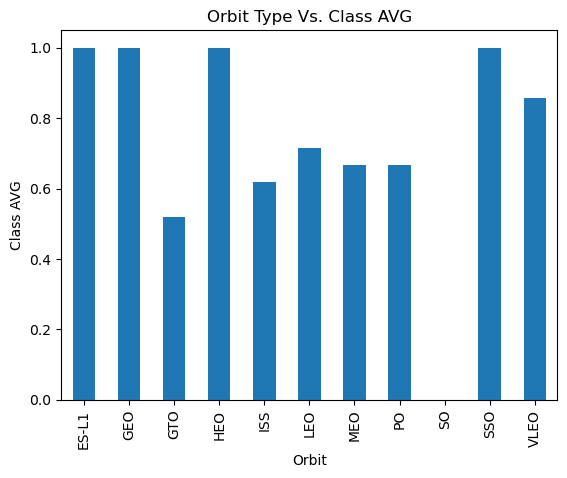

In [7]:
grouped_by_orbit.plot(kind='bar')
plt.title('Orbit Type Vs. Class AVG')
plt.ylabel('Class AVG')

#### Inferences:
1. Launch sites with highest success rate are ES-L1, GEO, HEO, SSO, and VLEO

### 4. Illustrating the relationship between FlightNumber and Orbit type

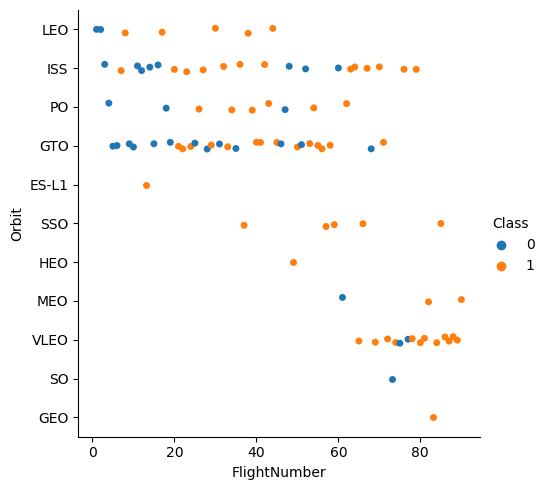

In [8]:
sns.catplot(data=df, x='FlightNumber', y='Orbit',hue ='Class')

#### Inferences:
1. As FlightNumber progresses we see a lower likelihood of a failed class assignment, specially notable after flight number 80.

### 5. Illustrating the relationship between Payload and Orbit type

<Axes: xlabel='PayloadMass', ylabel='Orbit'>

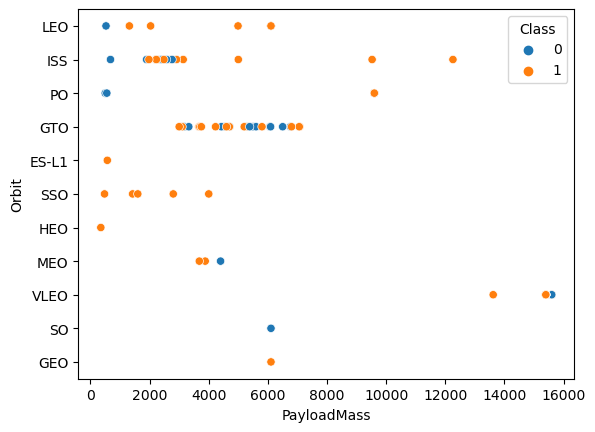

In [9]:
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')

#### Inferences:
1. LEO, ISS, and PO are more likely to have a succesful landing outcome with a heavy payload.

### 6. Illustrating the launch success yearly trends

In [10]:
# extracting years from data
years=[]
def extract_years(date):
    for i in df['Date']:
        years.append(i.split('-')[0])
    return years

In [11]:
# creating datafram with year and class columns
df_years = pd.DataFrame(extract_years(df['Date']), columns=['Year'])
df_years['Class'] = df['Class']

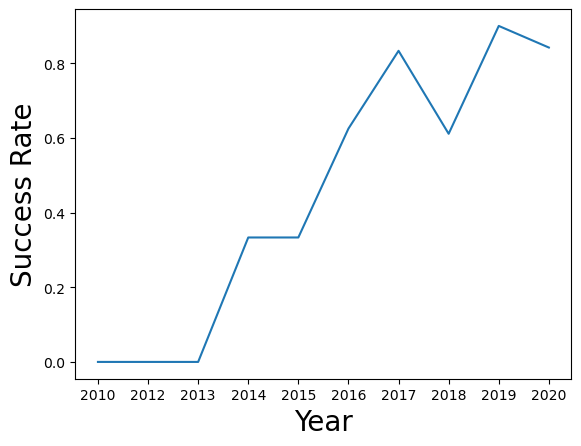

In [12]:
# plotting
sns.lineplot(x=np.unique(extract_years(df['Date'])),
             y=df_years.groupby('Year')['Class'].mean())
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()

#### 6. Inferences:
1. We can observe that success rate maintained an up trend after 2013 until 2017 where we took a dip for 2018 but recontinued up to 2020.

## Features Engineering
At this point we know how each important variable will affect the success rate, so we'll extract those for further analysis.

In [13]:
feats = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
feats.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### 7. Creating dummy variables for categorical features

In [16]:
features_one_hot = pd.get_dummies(feats, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 8. Cast all numeric columns to `float64`

In [19]:
features_one_hot = features_one_hot.astype('float64')

In [20]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

#### Lastly, we'll save our progress and export our dataframe to a CSV file.

In [22]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)